In [ ]:
# payload = {

# # 模型设置
# "override_settings":{
#       "sd_model_checkpoint": "v1-5-pruned.ckpt",
#       "sd_vae": "animevae.pt",
#       "CLIP_stop_at_last_layers": 2,
# },

# # 基本参数 
#   "prompt": "",
#   "negative_prompt": "",
#   "styles": [
#     "string"
#   ],
#   "seed": -1,
#   "subseed": -1,
#   "subseed_strength": 0,
#   "seed_resize_from_h": -1,
#   "seed_resize_from_w": -1,
#   "sampler_name": "string",
#   "scheduler": "string",
#   "batch_size": 1,
#   "n_iter": 1,
#   "steps": 50,
#   "cfg_scale": 7,
#   "width": 512,
#   "height": 512,
#   "restore_faces": true,
#   "tiling": true,
#   "do_not_save_samples": false,
#   "do_not_save_grid": false,
#   "eta": 0,
#   "denoising_strength": 0,
#   "s_min_uncond": 0,
#   "s_churn": 0,
#   "s_tmax": 0,
#   "s_tmin": 0,
#   "s_noise": 0,
#   "override_settings": {},
#   "override_settings_restore_afterwards": true,
#   "refiner_checkpoint": "string",
#   "refiner_switch_at": 0,
#   "disable_extra_networks": false,
#   "firstpass_image": "string",
#   "comments": {},
#   "enable_hr": false,
#   "firstphase_width": 0,
#   "firstphase_height": 0,
#   "hr_scale": 2,
#   "hr_upscaler": "string",
#   "hr_second_pass_steps": 0,
#   "hr_resize_x": 0,
#   "hr_resize_y": 0,
#   "hr_checkpoint_name": "string",
#   "hr_sampler_name": "string",
#   "hr_scheduler": "string",
#   "hr_prompt": "",
#   "hr_negative_prompt": "",
#   "force_task_id": "string",
#   "sampler_index": "Euler",
#   "script_name": "string",
#   "script_args": [],
#   "send_images": true,
#   "save_images": false,
#   "alwayson_scripts": {},
#   "infotext": "string"

# # 高清修复 highres fix
# "enable_hr": True,
# "denoising_strength": 0.4,
# "hr_scale": 2,
# "hr_upscaler": "Latent",

# }

In [45]:
import base64  
from PIL import Image  
from io import BytesIO  
  
def image_to_base64(image_path):  
    with Image.open(image_path) as image_file:  
        # 将图片读取为字节流  
        encoded_string = BytesIO()  
        image_file.save(encoded_string, format='PNG')  # 或者 'JPEG' 取决于你想要的图片格式  
        # 将字节流转换为Base64编码  
        base64_data = base64.b64encode(encoded_string.getvalue()).decode('utf-8')  
        return base64_data  
  
# 使用函数  
base64_string = image_to_base64('test-input.jpg')  
print(base64_string)

iVBORw0KGgoAAAANSUhEUgAAAWIAAAEOCAIAAAA8CIoMAAEAAElEQVR4nNT9Xa8sSXIgiJmZe0RknnM/q6tJNjlskgMthFnsLsCFxIWetBIGehcWgwUkaB/2N0mA/of0E+ZdEHal5YxmyGGTTfZHVVfde8/JzIhwN9ODuVtaeETkOefW7e4dx62sPJEe7ubmZuZm5ubm+H/8b/8VvKQEjJvPRWS7fgibz6dp2nrMFEMIGGMMIRCRiOScmZmIiCiEEEJARK6FqNc3ERER9Ys9ISJEFBERYWYRES5/6hN9CABd19m71hQAEJG15j9FpHniu16XvZ8QeO+V7ZK36++1T9voB+YX9rtTOF/xDACGZ8PbCtCX9ZtlZ1w77e9U362P22QLMUYljPXnNpw5b9ZMafIP7XnzpDxHFhGRrJR5BdLhVhnBWAAxdF03DEPXdQDMzJCZmUOkDx8+fPrwMeesHKB9xNgLbgyKiKZp0qmcpulyueg88pRyzts8/xllj0z3yHGnPuac/Vwo3ESk7SimlEuhsqv/su694XNxXZsQgaVw2eP5J2XB77HsUfAeYe+y8U65MY8e+SY9X1r2OfC3i+29ceWcYc3G9fm6NIznh7MpYjbHu/nQ49PWPP0eQiBdVxFTSswJACJS13XffPvr8/k8zzMAhIDNpKz5ZZ7nnLMyWkoJAHSRZkJkjLgnTnfLy1azvUVrT0xwlcoAICKqUyjEUMWEf6EZrY1f6VWH7Tk/p+wB8NJh/Xzv1xtlj9y/lHB5eTsvnd+XFZsanRcFzx7+8PKl8LYnDniH7WFHj3ipmPD8tZYXbRfYipjayFV7NZ0ilNJ5FIlI5pxz/vTpU84ZAUIIRNdmEVFA1s3mnPVLSkk1fZ3EGCMTvVib2FWed5+/rB0SAmC1NazmesKwFmax0bq5QaPdRpswctnTGp75/EuxwZcq++z024XTsNHMy0vxs6fd5C8E/kvhafQIv/Zs1jfrtZEFuKXhr794

In [46]:
import requests
url = "http://127.0.0.1:6006"

payload = {
    "prompt": "kitchen, <lora:FT_lora:1>",
    "steps": 5,
    "alwayson_scripts": {

        "ControlNet": {
            "args": [
                {"enabled": True,
                 "input_image": base64_string,
                 "mask": None,
                 "module": "mlsd",
                 "model": "control_v11p_sd15_mlsd [aca30ff0]",
                 "weight": 1,
                 "invert_image": False,
                 "rgbbgr_mode": False,
                 "lowvram": False,
                 "processor_res": 512,
                 "threshold_a": 100,
                 "threshold_b": 200,
                 "starting_control_step": 0,
                 "ending_control_step": 1,
                 # "guidance": 1,
                 # "guidance_start": 0,
                 # "guidance_end": 1,
                 "guessmode": False
                 }
            ]
        }
    }
}

response = requests.post(url=f'{url}/sdapi/v1/txt2img', json=payload)

r = response.json()
print(r)


{'images': ['iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAAB2nRFWHRwYXJhbWV0ZXJzAGtpdGNoZW4sIDxsb3JhOkZUX2xvcmE6MT4KU3RlcHM6IDUsIFNhbXBsZXI6IEV1bGVyLCBDRkcgc2NhbGU6IDcuMCwgU2VlZDogMTQwNjYxNjYzOSwgU2l6ZTogNTEyeDUxMiwgTW9kZWwgaGFzaDogNmNlMDE2MTY4OSwgTW9kZWw6IHYxLTUtcHJ1bmVkLWVtYW9ubHksIENvbnRyb2xOZXQgMDogIk1vZHVsZTogbWxzZCwgTW9kZWw6IGNvbnRyb2xfdjExcF9zZDE1X21sc2QgW2FjYTMwZmYwXSwgV2VpZ2h0OiAxLjAsIFJlc2l6ZSBNb2RlOiBDcm9wIGFuZCBSZXNpemUsIFByb2Nlc3NvciBSZXM6IDUxMiwgVGhyZXNob2xkIEE6IDAuMSwgVGhyZXNob2xkIEI6IDAuMSwgR3VpZGFuY2UgU3RhcnQ6IDAuMCwgR3VpZGFuY2UgRW5kOiAxLjAsIFBpeGVsIFBlcmZlY3Q6IEZhbHNlLCBDb250cm9sIE1vZGU6IEJhbGFuY2VkIiwgTG9yYSBoYXNoZXM6ICJGVF9sb3JhOiA2Mzk0YjAxY2JhZWEiLCBWZXJzaW9uOiB2MS45LjRklukjAAEAAElEQVR4nGz9PbNkW64kiDmAtSNOZt5br+p9zLTA/0CNCv8qzaiMQo6R1mZsCvwRVClTGWnYJPtVZeaJvRfgFBzYcd4Yb/erupV5TsT+WAtwOBy+7P/4n/+LJdfxKKT7ytzH45HXPh4HmWsdAFjlHsvN13KAYHiQ9BUGmDuz1mOxCMDcDWZuBpAwM5LuBsAMMAdI0jxAuoEA4GSFB1lmBliR7g6WmRM0Mzcr0s2LZcD956wydzOwaOZFGgwGkNYfDnMHqSuB/jHr/wYBI2lmIMxB9nVDn0/9eP8

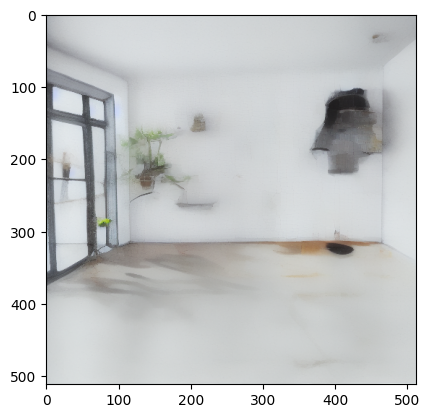

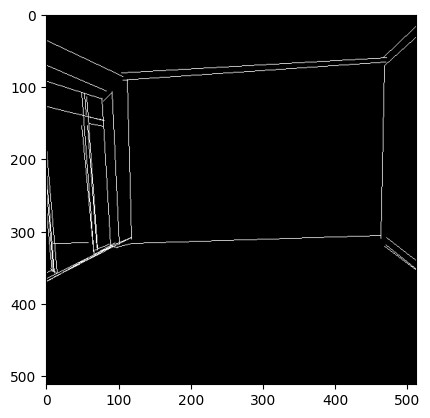

In [47]:
%matplotlib inline
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt 

r = response.json()
j=0
for i in r['images']:
    image = Image.open(io.BytesIO(base64.b64decode(i.split(",", 1)[0])))
    image.save(f'{j}.png')
    j+=1
    
    plt.imshow(image)
    plt.show()
